<a href="https://colab.research.google.com/github/MoonlightO2/Movie-Analysis-Recommendation/blob/main/Wikipedia_Movie_Analysis_%26_Recommendation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Wikipedia Movie Analysis & Recommendation**
***Datasets***: https://www.kaggle.com/datasets/jrobischon/wikipedia-movie-plots

### **1. Data Preprocessing**

In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import linear_kernel

In [2]:
# Load the data
data_path = '/content/drive/MyDrive/2. Projects/Colab Notebooks/Portfolio/Movies & TV/Wikipedia Movies.csv'

In [3]:
wiki_data = pd.read_csv(data_path)
print('Shape: ', wiki_data.shape, '\n')
print('Columns: ', wiki_data.columns.tolist(), '\n')
wiki_data.head()

Shape:  (34886, 8) 

Columns:  ['Release Year', 'Title', 'Origin/Ethnicity', 'Director', 'Cast', 'Genre', 'Wiki Page', 'Plot'] 



,Release Year,Title,Origin/Ethnicity,Director,Cast,Genre,Wiki Page,Plot
0,1901,Kansas Saloon Smashers,American,Unknown,NaN,unknown,https://en.wikipedia.org/wiki/Kansas_Saloon_Sm...,"A bartender is working at a saloon, serving dr..."
1,1901,Love by the Light of the Moon,American,Unknown,NaN,unknown,https://en.wikipedia.org/wiki/Love_by_the_Ligh...,"The moon, painted with a smiling face hangs ov..."
2,1901,The Martyred Presidents,American,Unknown,NaN,unknown,https://en.wikipedia.org/wiki/The_Martyred_Pre...,"The film, just over a minute long, is composed..."
3,1901,"Terrible Teddy, the Grizzly King",American,Unknown,NaN,unknown,"https://en.wikipedia.org/wiki/Terrible_Teddy,_...",Lasting just 61 seconds and consisting of two ...
4,1902,Jack and the Beanstalk,American,"George S. Fleming, Edwin S. Porter",NaN,unknown,https://en.wikipedia.org/wiki/Jack_and_the_Bea...,The earliest known adaptation of the classic f...


In [4]:
columns_to_check = ['Release Year', 'Title', 'Origin/Ethnicity', 'Director', 'Cast', 'Genre', 'Wiki Page', 'Plot']

for column in columns_to_check:
    unique_values = wiki_data[column].unique()
    count_unique_values = wiki_data[column].nunique()

    print(f"Column: {column}")
    print(f"Count of Unique Values: {count_unique_values}")
    print(f"Unique Values: {unique_values}")
    print("\n")

Column: Release Year
Count of Unique Values: 117
Unique Values: [1901 1902 1903 1904 1905 1906 1907 1908 1909 1910 1911 1912 1913 1914
 1915 1916 1917 1918 1919 1920 1921 1922 1923 1924 1925 1926 1927 1928
 1929 1930 1931 1932 1933 1934 1935 1936 1937 1938 1939 1940 1941 1942
 1943 1944 1945 1946 1947 1948 1949 1950 1951 1952 1953 1954 1955 1956
 1957 1958 1959 1960 1961 1962 1963 1964 1965 1966 1967 1968 1969 1970
 1971 1972 1973 1974 1975 1976 1977 1978 1979 1980 1981 1982 1983 1984
 1985 1986 1987 1988 1989 1990 1991 1992 1993 1994 1995 1996 1997 1998
 1999 2000 2001 2002 2003 2004 2005 2006 2007 2008 2009 2010 2011 2012
 2013 2014 2015 2016 2017]


Column: Title
Count of Unique Values: 32432
Unique Values: ['Kansas Saloon Smashers' 'Love by the Light of the Moon'
 'The Martyred Presidents' ... 'Olanlar Oldu' 'Non-Transferable'
 'İstanbul Kırmızısı']


Column: Origin/Ethnicity
Count of Unique Values: 24
Unique Values: ['American' 'Australian' 'Bangladeshi' 'British' 'Canadian' 'Chin

In [5]:
# Explore the data - Basic statistics
wiki_data.describe()

,Release Year
count,34886.000000
mean,1981.314252
std,27.815174
min,1901.000000
25%,1957.000000
50%,1988.000000
75%,2007.000000
max,2017.000000


In [6]:
# Check for missing values and show only columns with null values
null_columns = wiki_data.columns[wiki_data.isnull().any()]
wiki_data[null_columns].isnull().sum()

Cast    1422
dtype: int64

In [7]:
print('Columns: ', wiki_data.columns.tolist(), '\n')

Columns:  ['Release Year', 'Title', 'Origin/Ethnicity', 'Director', 'Cast', 'Genre', 'Wiki Page', 'Plot'] 



In [8]:
missing_data = ['Release Year', 'Title', 'Origin/Ethnicity', 'Director', 'Cast', 'Genre', 'Wiki Page', 'Plot']

# Fill missing values with the mode for categorical columns
for column in missing_data:
    wiki_data[column].fillna(wiki_data[column].mode()[0], inplace=True)

In [9]:
# Check for missing values and show only columns with null values
null_columns = wiki_data.columns[wiki_data.isnull().any()]
null_values = wiki_data[null_columns].isnull().sum()

if null_values.empty:
    print("No null values found in the specified columns.")
else:
    print("Null values found in the following columns:")
    print(null_values)

No null values found in the specified columns.


### **2. Data Analysis**

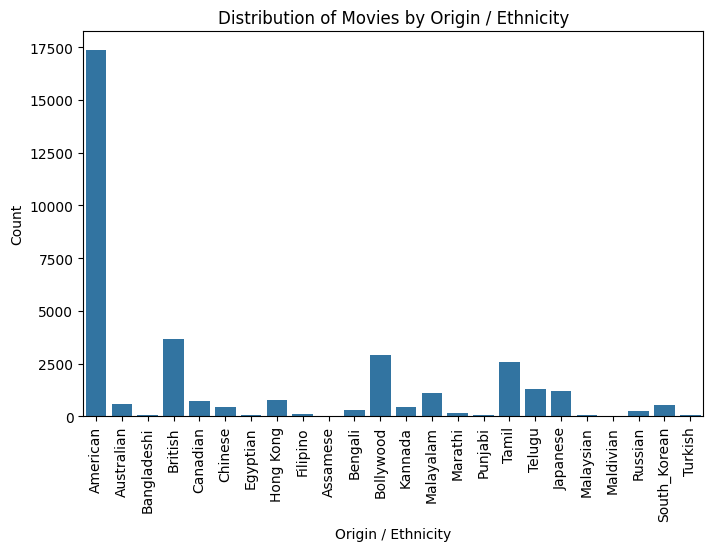

In [10]:
# 'Release Year', 'Title', 'Origin/Ethnicity', 'Director', 'Cast', 'Genre', 'Wiki Page', 'Plot'
# Plotting the distribution of movie types (TV Show vs. Movie)
plt.figure(figsize=(8, 5))
sns.countplot(x='Origin/Ethnicity', data=wiki_data)
plt.title('Distribution of Movies by Origin / Ethnicity')
plt.xlabel('Origin / Ethnicity')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()

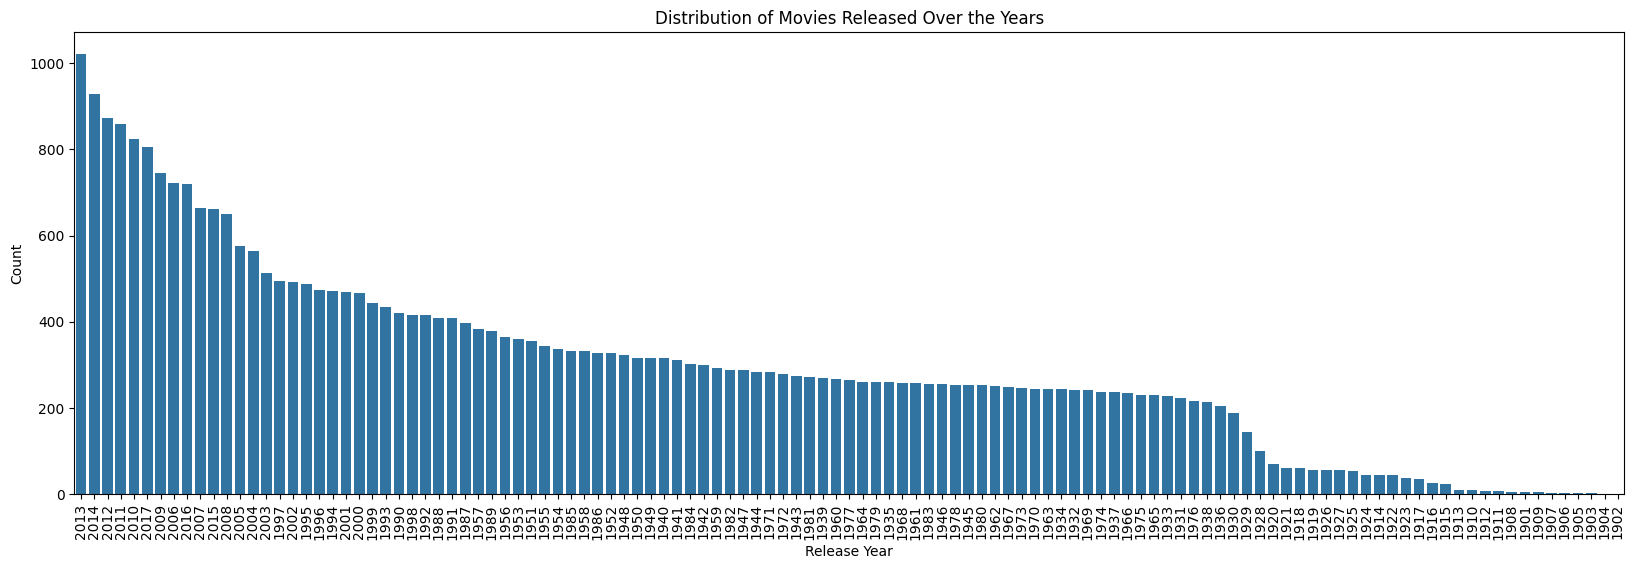

In [11]:
# 'Release Year', 'Title', 'Origin/Ethnicity', 'Director', 'Cast', 'Genre', 'Wiki Page', 'Plot'
# Plotting the distribution of movies released over the years
plt.figure(figsize=(20, 6))
sns.countplot(x='Release Year', data=wiki_data, order=wiki_data['Release Year'].value_counts().index)
plt.title('Distribution of Movies Released Over the Years')
plt.xlabel('Release Year')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()

### **3. Movie Recommendation**

In [12]:
# 'Release Year', 'Title', 'Origin/Ethnicity', 'Director', 'Cast', 'Genre', 'Wiki Page', 'Plot'
# Drop rows with missing values in important columns
wiki_data = wiki_data.dropna(subset=['Title', 'Director', 'Cast', 'Genre', 'Plot'])

# Combine relevant text columns to create a 'combined_features' column
wiki_data['Features'] = wiki_data['Title'] + ' ' + wiki_data['Director'] + ' ' + wiki_data['Cast'] + ' ' + wiki_data['Genre'] + ' ' + wiki_data['Plot']

In [13]:
# Use TF-IDF Vectorizer to convert text data into vectors
tfidf_vectorizer = TfidfVectorizer(stop_words='english')
tfidf_matrix = tfidf_vectorizer.fit_transform(wiki_data['Features'])

In [14]:
import numpy as np
from sklearn.metrics.pairwise import linear_kernel

batch_size = 1000
num_samples = tfidf_matrix.shape[0]
cosine_sim = np.zeros((num_samples, num_samples))

for i in range(0, num_samples, batch_size):
    end_idx = min(i + batch_size, num_samples)
    cosine_sim[i:end_idx, :] = linear_kernel(tfidf_matrix[i:end_idx, :], tfidf_matrix)

In [15]:
# Function to get movie recommendations based on cosine similarity
def get_recommendations(title):
    try:
        idx = wiki_data.index[wiki_data['Title'] == title].tolist()[0]
    except IndexError:
        print(f"No recommendations found for movies similar to '{title}'.")
        return None

    sim_scores = list(enumerate(cosine_sim[idx]))
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    sim_scores = sim_scores[1:11]  # Get the top 10 similar movies

    movie_indices = [i[0] for i in sim_scores]
    return wiki_data['Title'].iloc[movie_indices]

In [16]:
user_input_movie_title = input("Movie Title: ")
recommendations = get_recommendations(user_input_movie_title)

if recommendations is not None:
    print(f"\nSimilar recommended movies for '{user_input_movie_title}':")
    for i, movie_title in enumerate(recommendations, start=1):
        print(f"{i}. {movie_title}")

Movie Title: Love by the Light of the Moon

Similar recommended movies for 'Love by the Light of the Moon':
1. This Girl's Life
2. Goin' South
3. Andrew Lau, Alan Mak
4. Nude on the Moon
5. Missile to the Moon
6. Set Up
7. Charley Moon
8. Pontiac Moon
9. Woh Phir Aayegi
10. Destination Moon
